In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats
import seaborn as sns

In [3]:
gencode = pd.read_table('C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Dados/human.gencode.v37.annotation.bed', encoding = 'utf8')
allgenes = pd.read_table('C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Dados/allgenes_foxo3_testis.csv', encoding = 'utf8', sep =";")
#allgenes.set_index("Gene ID",inplace = True)
allgenes['nlog10'] = -np.log10((allgenes['adj.P.Val']))
genes = pd.merge (gencode, allgenes)
genes.set_index("Gene Name", inplace = True)
genes = genes.drop(columns = ['Chrm', 'Start', 'End', 'Strand'])
genes ['valor'] = (np.sign(genes ['logFC']) - genes['nlog10'])
genes

,Gene ID,logFC,AveExpr,t,P.Value,adj.P.Val,B,nlog10,valor
Gene Name,,,,,,,,,
WASH7P,ENSG00000227232.5,0.111319,4.760990,1.042128,0.301185,0.603850,-5.484692,0.219071,0.780929
MIR6859-1,ENSG00000278267.1,0.284820,-0.325965,1.933911,0.057448,0.311507,-4.013608,0.506532,0.493468
AL627309.1,ENSG00000238009.6,0.090569,1.074792,0.644858,0.521272,0.751675,-5.507693,0.123970,0.876030
AL627309.3,ENSG00000239945.1,-0.190685,-0.899045,-0.402990,0.688269,0.846443,-5.502065,0.072402,-1.072402
CICP27,ENSG00000233750.3,0.010739,-0.525448,0.068190,0.945842,0.976038,-5.596627,0.010533,0.989467
...,...,...,...,...,...,...,...,...,...
DAZ2,ENSG00000205944.11,0.064000,-1.165319,0.259273,0.796238,0.902813,-5.526302,0.044402,0.955598
PPP1R12BP1,ENSG00000229238.3,0.123895,-0.870367,0.642147,0.523020,0.752641,-5.396443,0.123412,0.876588
TPTE2P4,ENSG00000215506.5,0.223980,1.178258,0.990107,0.325767,0.622017,-5.260721,0.206198,0.793802


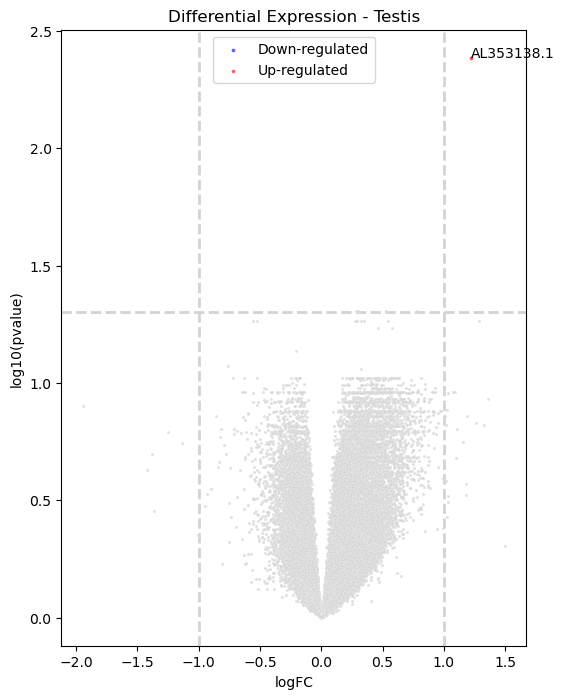

In [5]:
plt.figure(figsize = (6,8))

ax = sns.scatterplot(data = genes, x= 'logFC', y = 'nlog10', color = 'lightgray', s =5, alpha =0.7)
plt.title ('Differential Expression - Testis')
plt.ylabel ('log10(pvalue)')

down = genes[(genes['logFC']<=-1)&(genes['nlog10']>= -np.log10(0.05))]
up = genes[(genes['logFC']>=1)&(genes['nlog10']>= -np.log10(0.05))]

plt.scatter(x=down['logFC'],y=down['nlog10'],s=3,label="Down-regulated",color="blue", alpha = 0.5)
plt.scatter(x=up['logFC'],y=up['nlog10'],s=3,label="Up-regulated",color="red", alpha = 0.5)

down1 = genes[(genes['logFC']<=-1)&(genes['nlog10']>= 1)]
up1 = genes[(genes['logFC']>=1)&(genes['nlog10'] >= 2)]

for i,r in up1.iterrows():
    plt.text(x=r['logFC'],y=r['nlog10'],s=i)

for i,r in down1.iterrows():
    plt.text(x=r['logFC'],y=r['nlog10'],s=i)


ax.axhline (-np.log10(0.05), zorder = 0, c = 'lightgray', lw = 2, ls = '--')
ax.axvline (1, zorder = 0, c = 'lightgray', lw = 2, ls = '--')
ax.axvline (-1, zorder = 0, c = 'lightgray', lw = 2, ls = '--')
plt.legend()
plt.savefig('Differencial Expression_Testis_Age.png', format = 'png', dpi = 1200, bbox_inches ='tight')

In [9]:
#Criar tabela para a análise GSEA
enr = pd.merge (gencode, allgenes)
enr ['valor'] = (np.sign(enr ['logFC'])* -np.log10(enr['adj.P.Val']))
enr1 = pd.DataFrame ([enr['Gene Name'], enr ['valor']])
enr1 = enr1.T
enr1= enr1.sort_values(by='valor')
enr1.to_csv('Gene_Analysis_testis_foxo3.rnk', sep='\t', header= False, index= False)
enr1

,Gene Name,valor
11011,HCG21,-1.261717
11010,MUCL3,-1.261717
12045,SF3B5,-1.136702
25527,AC138932.1,-1.0717
4751,AC005042.1,-1.020802
...,...,...
6260,CACNA2D3-AS1,1.307616
4201,ZNF514,1.307616
13108,ELN,1.307616
11429,PTCHD4,2.286456
